In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os  # For file path manipulation


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/MyDrive/Cars"  # Replace with your actual path
train_signal_dir = os.path.join(data_dir, "signals")
train_nocar_dir = os.path.join(data_dir, "Nocar")
train_car_dir = os.path.join(data_dir, "Test/Images/Cars")
test_dir = os.path.join(data_dir, "Test")  # Assuming your test images are here




In [ ]:
import os

# Definir los directorios de entrenamiento y prueba
data_dir = "/content/drive/MyDrive/Cars"
train_signal_dir = os.path.join(data_dir, "signals")
train_nocar_dir = os.path.join(data_dir, "Nocar")
train_car_dir = os.path.join(data_dir, "Test/Images/Cars")
test_dir = os.path.join(data_dir, "Test")

# Función para contar el número de imágenes en un directorio
def count_images(directory):
    num_images = len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])
    return num_images

# Contar el número de imágenes en cada directorio
num_train_signal = count_images(train_signal_dir)
num_train_nocar = count_images(train_nocar_dir)
num_train_car = count_images(train_car_dir)
num_test = count_images(test_dir)

# Imprimir el número de imágenes en cada directorio
print(f"Número de imágenes en train_signal_dir: {num_train_signal}")
print(f"Número de imágenes en train_nocar_dir: {num_train_nocar}")
print(f"Número de imágenes en train_car_dir: {num_train_car}")
print(f"Número de imágenes en test_dir: {num_test}")


Número de imágenes en train_signal_dir: 10
Número de imágenes en train_nocar_dir: 18
Número de imágenes en train_car_dir: 3021
Número de imágenes en test_dir: 0


In [ ]:
# Definir el generador de flujo de datos para cargar imágenes de los directorios
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(200, 200),    # Tamaño al que se redimensionarán las imágenes
    batch_size=32,             # Tamaño del lote
    class_mode='categorical',  # Modo de clasificación categórica
    classes=['Cars', 'signals', 'Nocars']  # Especificar las clases manualmente
)


Found 3028 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Definir el modelo de CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 clases: Cars, signals, Nocars
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_generator, epochs=10)


Epoch 1/10
95/95 [==============================] - 379s 3s/step - loss: 0.0616 - accuracy: 0.9871
Epoch 2/10
95/95 [==============================] - 315s 3s/step - loss: 0.0389 - accuracy: 0.9967
Epoch 3/10
95/95 [==============================] - 319s 3s/step - loss: 0.0557 - accuracy: 0.9967
Epoch 4/10
95/95 [==============================] - 311s 3s/step - loss: 0.0469 - accuracy: 0.9967
Epoch 5/10
95/95 [==============================] - 312s 3s/step - loss: 0.0210 - accuracy: 0.9967
Epoch 6/10
95/95 [==============================] - 308s 3s/step - loss: 0.0209 - accuracy: 0.9967
Epoch 7/10
95/95 [==============================] - 315s 3s/step - loss: 0.0194 - accuracy: 0.9967
Epoch 8/10
95/95 [==============================] - 314s 3s/step - loss: 0.0215 - accuracy: 0.9967
Epoch 9/10
95/95 [==============================] - 310s 3s/step - loss: 0.0175 - accuracy: 0.9967
Epoch 10/10
95/95 [==============================] - 319s 3s/step - loss: 0.0150 - accuracy: 0.9970


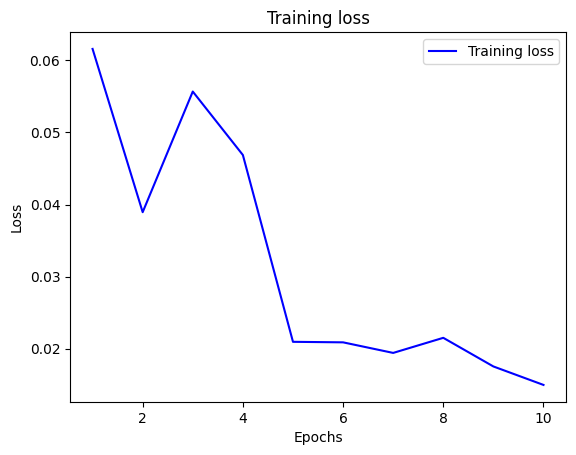

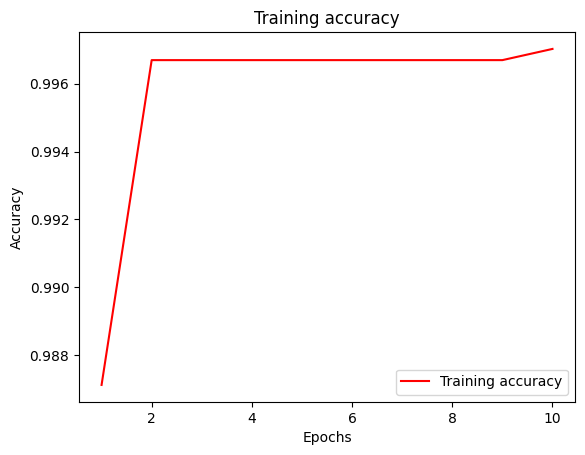

In [ ]:
# Obtener la pérdida y la precisión del entrenamiento
loss = history.history['loss']
accuracy = history.history['accuracy']

# Obtener el número de épocas
epochs = range(1, len(loss) + 1)

# Graficar la pérdida
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficar la precisión
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import os

# Directorio donde se creará la carpeta
folder_path = '/content/drive/MyDrive/Cars/Test'

# Verificar si la carpeta ya existe
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Carpeta '{folder_path}' creada correctamente.")
else:
    print(f"La carpeta '{folder_path}' ya existe.")


Carpeta '/content/drive/MyDrive/Cars/Test' creada correctamente.


In [ ]:
# Guardar el modelo entrenado
model.save('/content/drive/MyDrive/Cars/modelo_entrenado.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
loaded_model = load_model('/content/drive/MyDrive/Cars/modelo_entrenado.h5')


1/1 [==============================] - 0s 187ms/step
Clase predicha: 0
Nombre de la clase predicha: Nocars


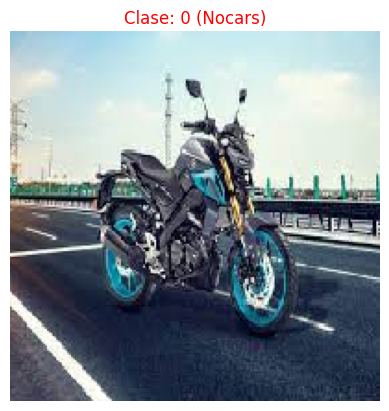

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Mapeo de clases
class_names = ['Nocars', 'signals', 'Cars']

# Cargar el modelo entrenado
loaded_model = load_model('/content/drive/MyDrive/Cars/modelo_entrenado.h5')

# Cargar la imagen de prueba
img_path = '/content/drive/MyDrive/Cars/Nocar/download (1).jpg'
img = image.load_img(img_path, target_size=(200, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión adicional para el lote

# Normalizar la imagen
img_array = img_array / 255.0

# Hacer predicciones
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions)

# Imprimir la clase predicha y su nombre
print("Clase predicha:", predicted_class)
print("Nombre de la clase predicha:", class_names[predicted_class])

# Mostrar la imagen con un recuadro alrededor si está clasificada correctamente
plt.imshow(img)
if predicted_class == 2:  # Si la clase predicha es Nocar
    plt.title("Clase: {} ({})".format(predicted_class, class_names[predicted_class]), color='green')
else:
    plt.title("Clase: {} ({})".format(predicted_class, class_names[predicted_class]), color='red')
plt.axis('off')
plt.show()



Predicciones para las imágenes de Carros:
1/1 [==============================] - 0s 161ms/step
Imagen: /content/drive/MyDrive/Cars/Cars/12762.jpg
Clase predicha: 0
Nombre de la clase predicha: Nocars


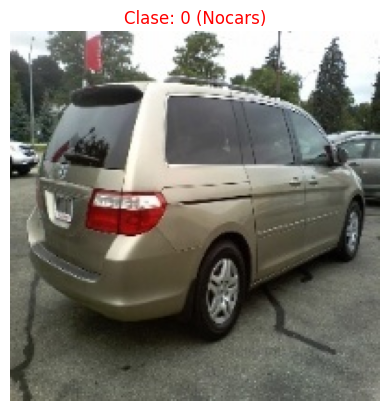

1/1 [==============================] - 0s 72ms/step
Imagen: /content/drive/MyDrive/Cars/Cars/4305.jpg
Clase predicha: 0
Nombre de la clase predicha: Nocars


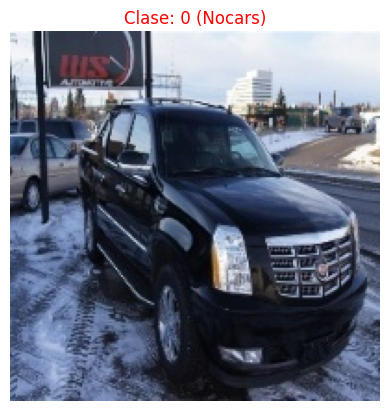

1/1 [==============================] - 0s 85ms/step
Imagen: /content/drive/MyDrive/Cars/Cars/3108.jpg
Clase predicha: 0
Nombre de la clase predicha: Nocars


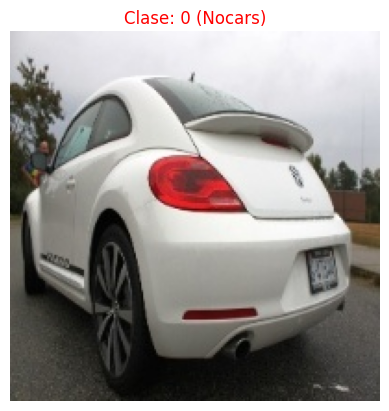

1/1 [==============================] - 0s 92ms/step
Imagen: /content/drive/MyDrive/Cars/Cars/13584.jpg
Clase predicha: 0
Nombre de la clase predicha: Nocars


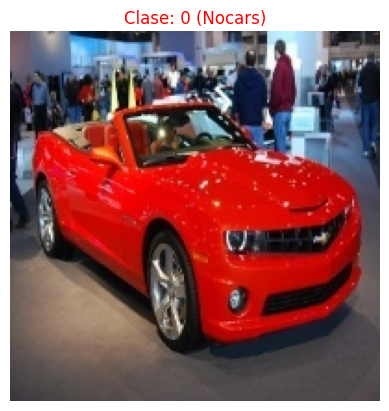

1/1 [==============================] - 0s 69ms/step
Imagen: /content/drive/MyDrive/Cars/Cars/10681.jpg
Clase predicha: 0
Nombre de la clase predicha: Nocars


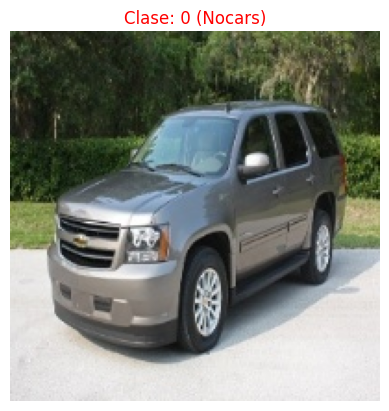


Predicciones para las imágenes de Signals:
1/1 [==============================] - 0s 51ms/step
Imagen: /content/drive/MyDrive/Cars/signals/perturbed_road89.png
Clase predicha: 1
Nombre de la clase predicha: signals


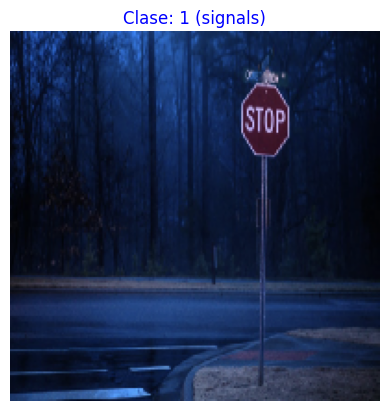

1/1 [==============================] - 0s 52ms/step
Imagen: /content/drive/MyDrive/Cars/signals/perturbed_road94.png
Clase predicha: 1
Nombre de la clase predicha: signals


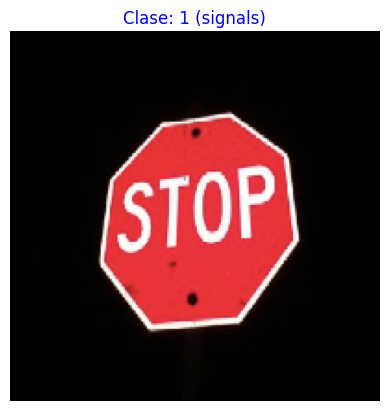

1/1 [==============================] - 0s 55ms/step
Imagen: /content/drive/MyDrive/Cars/signals/perturbed_road870.png
Clase predicha: 0
Nombre de la clase predicha: Nocars


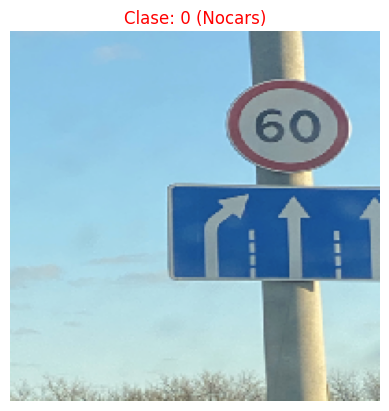

1/1 [==============================] - 0s 56ms/step
Imagen: /content/drive/MyDrive/Cars/signals/perturbed_road874.png
Clase predicha: 0
Nombre de la clase predicha: Nocars


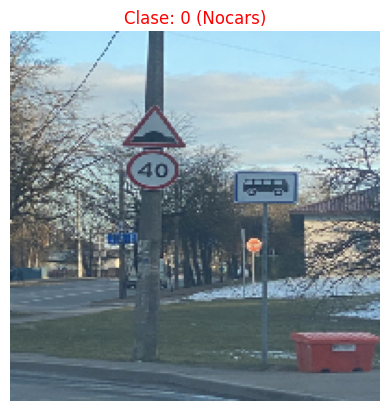

1/1 [==============================] - 0s 54ms/step
Imagen: /content/drive/MyDrive/Cars/signals/perturbed_road9.png
Clase predicha: 1
Nombre de la clase predicha: signals


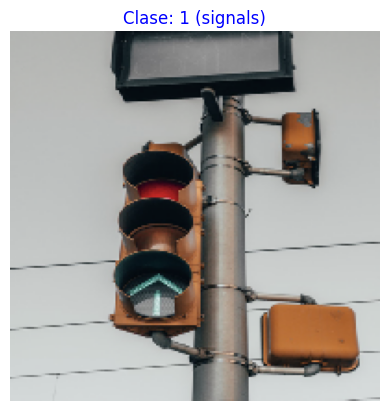


Predicciones para las imágenes de No Cars:
1/1 [==============================] - 0s 58ms/step
Imagen: /content/drive/MyDrive/Cars/Nocar/download (7).jpg
Clase predicha: 0
Nombre de la clase predicha: Nocars


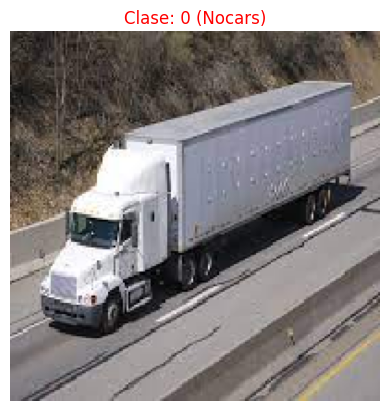

1/1 [==============================] - 0s 52ms/step
Imagen: /content/drive/MyDrive/Cars/Nocar/download (5).jpg
Clase predicha: 0
Nombre de la clase predicha: Nocars


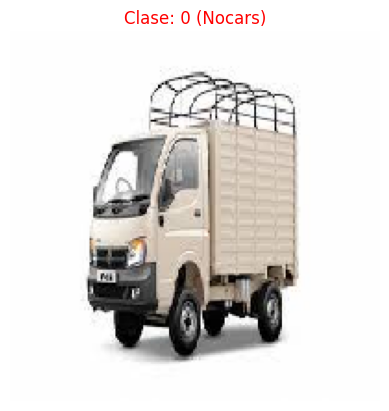

1/1 [==============================] - 0s 57ms/step
Imagen: /content/drive/MyDrive/Cars/Nocar/images (2).jpg
Clase predicha: 0
Nombre de la clase predicha: Nocars


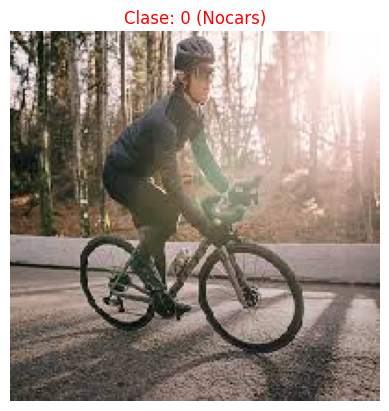

1/1 [==============================] - 0s 49ms/step
Imagen: /content/drive/MyDrive/Cars/Nocar/images (3).jpg
Clase predicha: 0
Nombre de la clase predicha: Nocars


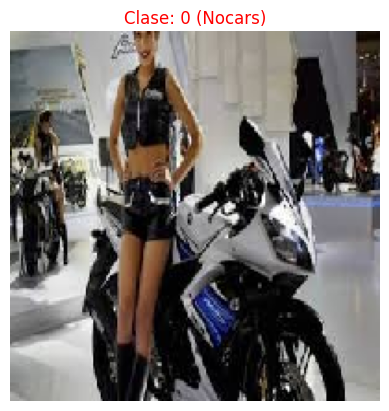

1/1 [==============================] - 0s 49ms/step
Imagen: /content/drive/MyDrive/Cars/Nocar/download (6).jpg
Clase predicha: 0
Nombre de la clase predicha: Nocars


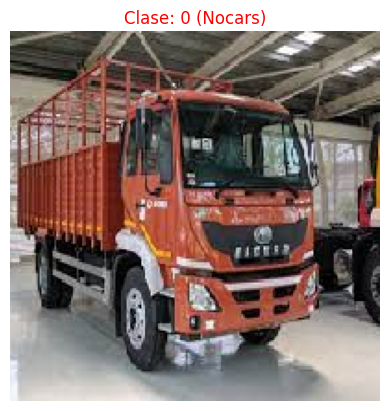

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Mapeo de clases
class_names = ['Nocars', 'signals', 'Cars']

# Cargar el modelo entrenado
loaded_model = load_model('/content/drive/MyDrive/Cars/modelo_entrenado.h5')

# Directorio base donde están almacenadas las imágenes de prueba
test_base_dir = '/content/drive/MyDrive/Cars/Test'

# Función para obtener rutas aleatorias de imágenes
# Función para obtener rutas aleatorias de imágenes
def get_random_image_paths(class_name, num_images=5):
    if class_name == 'Cars':
        class_dir = '/content/drive/MyDrive/Cars/Cars'
    elif class_name == 'Nocar':
        class_dir = '/content/drive/MyDrive/Cars/Nocar'
    elif class_name == 'signals':
        class_dir = '/content/drive/MyDrive/Cars/signals'
    else:
        raise ValueError("Clase no válida: {}".format(class_name))

    image_paths = [os.path.join(class_dir, img) for img in random.sample(os.listdir(class_dir), num_images)]
    return image_paths


# Función para hacer predicciones y mostrar imágenes
def predict_and_show_images(image_paths):
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=(200, 200))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión adicional para el lote
        img_array = img_array / 255.0  # Normalizar la imagen

        # Hacer predicciones
        predictions = loaded_model.predict(img_array)
        predicted_class = np.argmax(predictions)

        # Imprimir la clase predicha y su nombre
        print("Imagen:", img_path)
        print("Clase predicha:", predicted_class)
        print("Nombre de la clase predicha:", class_names[predicted_class])

        # Mostrar la imagen con un recuadro alrededor si está clasificada correctamente
        plt.imshow(img)
        if predicted_class == 0:  # Si la clase predicha es Cars
            plt.title("Clase: {} ({})".format(predicted_class, class_names[predicted_class]), color='red')
        elif predicted_class == 1:  # Si la clase predicha es signals
            plt.title("Clase: {} ({})".format(predicted_class, class_names[predicted_class]), color='blue')
        else:  # Si la clase predicha es Nocar
            plt.title("Clase: {} ({})".format(predicted_class, class_names[predicted_class]), color='green')
        plt.axis('off')
        plt.show()

# Obtener rutas aleatorias de imágenes para cada clase
num_images_per_class = 5
cars_image_paths = get_random_image_paths('Cars', num_images_per_class)
signals_image_paths = get_random_image_paths('signals', num_images_per_class)
nocar_image_paths = get_random_image_paths('Nocar', num_images_per_class)

# Hacer predicciones y mostrar imágenes para cada clase
print("\nPredicciones para las imágenes de Carros:")
predict_and_show_images(cars_image_paths)

print("\nPredicciones para las imágenes de Signals:")
predict_and_show_images(signals_image_paths)

print("\nPredicciones para las imágenes de No Cars:")
predict_and_show_images(nocar_image_paths)
